### Package call

In [ ]:
!pip install matplotlib

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

***Connect to the database***

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Nabila12345@",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database"),
        return self.connection

In [3]:
con = PostgresConnection().getConnection()

successfully connected to database


### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table 

#### Cube

In [4]:
cur = con.cursor()
select_stmt = " SELECT s.district, tim.year, SUM(f.total_price) " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              " JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key "\
              " GROUP BY CUBE (s.district,tim.year) "\
              " ORDER BY s.district"
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BAGERHAT', None, Decimal('1307651.00')),
 ('BAGERHAT', 2021, Decimal('9418.50')),
 ('BAGERHAT', 2020, Decimal('199102.25')),
 ('BAGERHAT', 2016, Decimal('180810.00')),
 ('BAGERHAT', 2014, Decimal('169968.00')),
 ('BAGERHAT', 2015, Decimal('180761.75')),
 ('BAGERHAT', 2018, Decimal('184449.25')),
 ('BAGERHAT', 2019, Decimal('192573.25')),
 ('BAGERHAT', 2017, Decimal('190568.00')),
 ('BANDARBAN', 2015, Decimal('144484.75')),
 ('BANDARBAN', None, Decimal('995360.75')),
 ('BANDARBAN', 2021, Decimal('9725.25')),
 ('BANDARBAN', 2020, Decimal('135162.75')),
 ('BANDARBAN', 2016, Decimal('135192.00')),
 ('BANDARBAN', 2019, Decimal('142752.25')),
 ('BANDARBAN', 2014, Decimal('140629.50')),
 ('BANDARBAN', 2018, Decimal('141819.00')),
 ('BANDARBAN', 2017, Decimal('145595.25')),
 ('BARGUNA', 2015, Decimal('119764.50')),
 ('BARGUNA', 2014, Decimal('115381.00')),
 ('BARGUNA', 2018, Decimal('132766.75')),
 ('BARGUNA', None, Decimal('869041.00')),
 ('BARGUNA', 2016, Decimal('120026.00')),
 ('BARGUNA

In [5]:
df = pd.DataFrame(list(records), columns=['district', 'year', 'total_price'])
df.head(10)

,district,year,total_price
0,BAGERHAT,NaN,1307651.00
1,BAGERHAT,2021.0,9418.50
2,BAGERHAT,2020.0,199102.25
3,BAGERHAT,2016.0,180810.00
4,BAGERHAT,2014.0,169968.00
5,BAGERHAT,2015.0,180761.75
6,BAGERHAT,2018.0,184449.25
7,BAGERHAT,2019.0,192573.25
8,BAGERHAT,2017.0,190568.00
9,BANDARBAN,2015.0,144484.75


#### ROLLUP

In [ ]:
cur = con.cursor()
select_stmt = " SELECT s.division, tim.month, SUM(f.total_price) " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              " JOIN ecomdb_star_schema.time_dim tim on tim.time_key=f.time_key "\
              " GROUP BY ROLLUP (s.division,tim.month) "\
              " ORDER BY s.division"
cur.execute(select_stmt)
records = cur.fetchall()
records

In [ ]:
df1 = pd.DataFrame(list(records), columns=['division', 'month', 'total_price'])
df1.head(10)

#### Slice

In [ ]:
cur = con.cursor()
select_stmt = " SELECT s.division,SUM(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              " Where s.division ='BARISAL' " \
              " GROUP BY s.division"
cur.execute(select_stmt)
records = cur.fetchall()
records

In [ ]:
df3 = pd.DataFrame(list(records), columns=['division', 'total_price'])
df3

#### Before Dicing

In [ ]:
cur = con.cursor()
select_stmt = " SELECT i.item_name,SUM(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key" \
              " Where i.item_name ='Cherry Coke 12oz' " \
              " GROUP BY i.item_name "
cur.execute(select_stmt)
records = cur.fetchall()
records

In [ ]:
df4 = pd.DataFrame(list(records), columns=['item_name', 'total_price'])
df4

#### After Dicing

In [ ]:
cur = con.cursor()
select_stmt = " SELECT i.item_name,SUM(f.total_price)" \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.store_dim s on s.store_key=f.store_key " \
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key" \
              " Where i.item_name ='Cherry Coke 12oz' and s.division='BARISAL'" \
              " GROUP BY i.item_name "
cur.execute(select_stmt)
records = cur.fetchall()
records

In [ ]:
df5 = pd.DataFrame(list(records), columns=['item_name', 'total_price'])
df5

### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [ ]:
cur = con.cursor()
select_stmt = " SELECT c.name, tr.bank_name, SUM(f.total_price) " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.coustomer_dim c on c.coustomer_key=f.coustomer_key " \
              " JOIN ecomdb_star_schema.trans_dim tr on tr.payment_key=f.payment_key "\
              " GROUP BY CUBE (c.name,tr.bank_name) "\
              " ORDER BY tr.bank_name"
cur.execute(select_stmt)
records = cur.fetchall()
records

In [ ]:
df6 = pd.DataFrame(list(records), columns=['Coustomer_name','Bank_name', 'total_price'])
df6.head(10)

In [ ]:
cur = con.cursor()
select_stmt = " SELECT c.name, i.item_name ,tr.bank_name , SUM(f.total_price) " \
              " From ecomdb_star_schema.fact_table f " \
              " JOIN ecomdb_star_schema.coustomer_dim c on c.coustomer_key=f.coustomer_key " \
              " JOIN ecomdb_star_schema.trans_dim tr on tr.payment_key=f.payment_key "\
              "JOIN ecomdb_star_schema.item_dim i on i.item_key=f.item_key " \
              " GROUP BY CUBE (c.name,i.item_name, tr.bank_name) "\
              " ORDER BY i.item_name"
cur.execute(select_stmt)
records = cur.fetchall()
records

In [ ]:
df7 = pd.DataFrame(list(records), columns=['Coustomer_name','Item_name','Bank_name', 'total_price'])
df7.head(10)

### Q3: Total sales in Barisal

In [ ]:
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(f.total_price)" \
        "FROM ecomdb_star_schema.fact_table f " \
        "JOIN ecomdb_star_schema.store_dim s on s.store_key = f.store_key " \
        "WHERE s.district = 'BARISAL' " \
        "GROUP BY CUBE (s.district)"
cur.execute(select_stmt)
records = cur.fetchall()
records

In [ ]:
df10 = pd.DataFrame(list(records), columns=['division', 'total_price'])
df10

## Histogram

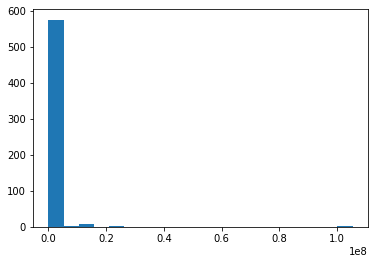

In [6]:
plt.hist(df['total_price'],bins=20)
plt.show()

## LinePlot

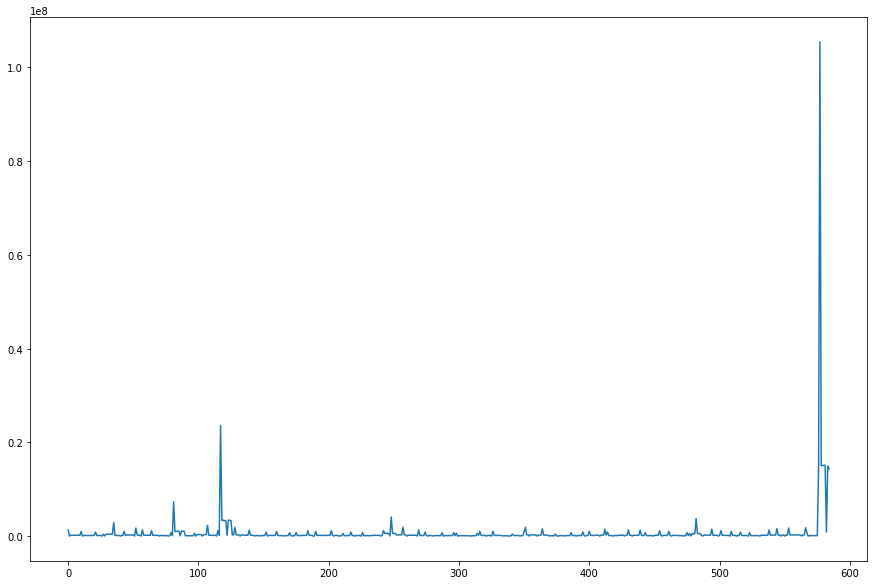

In [7]:
#a=df['year'
b=df['total_price']
plt.figure(figsize=(15,10))
#plt.plot(a)
plt.plot(b)
plt.show()

In [8]:
df['total_price']=df['total_price'].astype('float64')

In [9]:
df.dtypes

district        object
year           float64
total_price    float64
dtype: object

## Bar Chart

In [10]:
df['year']=df['year'].astype('float64')

In [ ]:
Year= df['year']
price = df['total_price']
District = df['district']
df = pd.DataFrame({'Year': Year,
                   'Total_Price': price}, index=District)
ax = df.plot.bar(rot=0)

In [ ]:
axes = df.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)  

## Pie Chart

In [ ]:
df_pie= df.set_index(['district'])

In [ ]:
plot = df_pie.plot.pie(y='total_price', figsize=(5, 5))